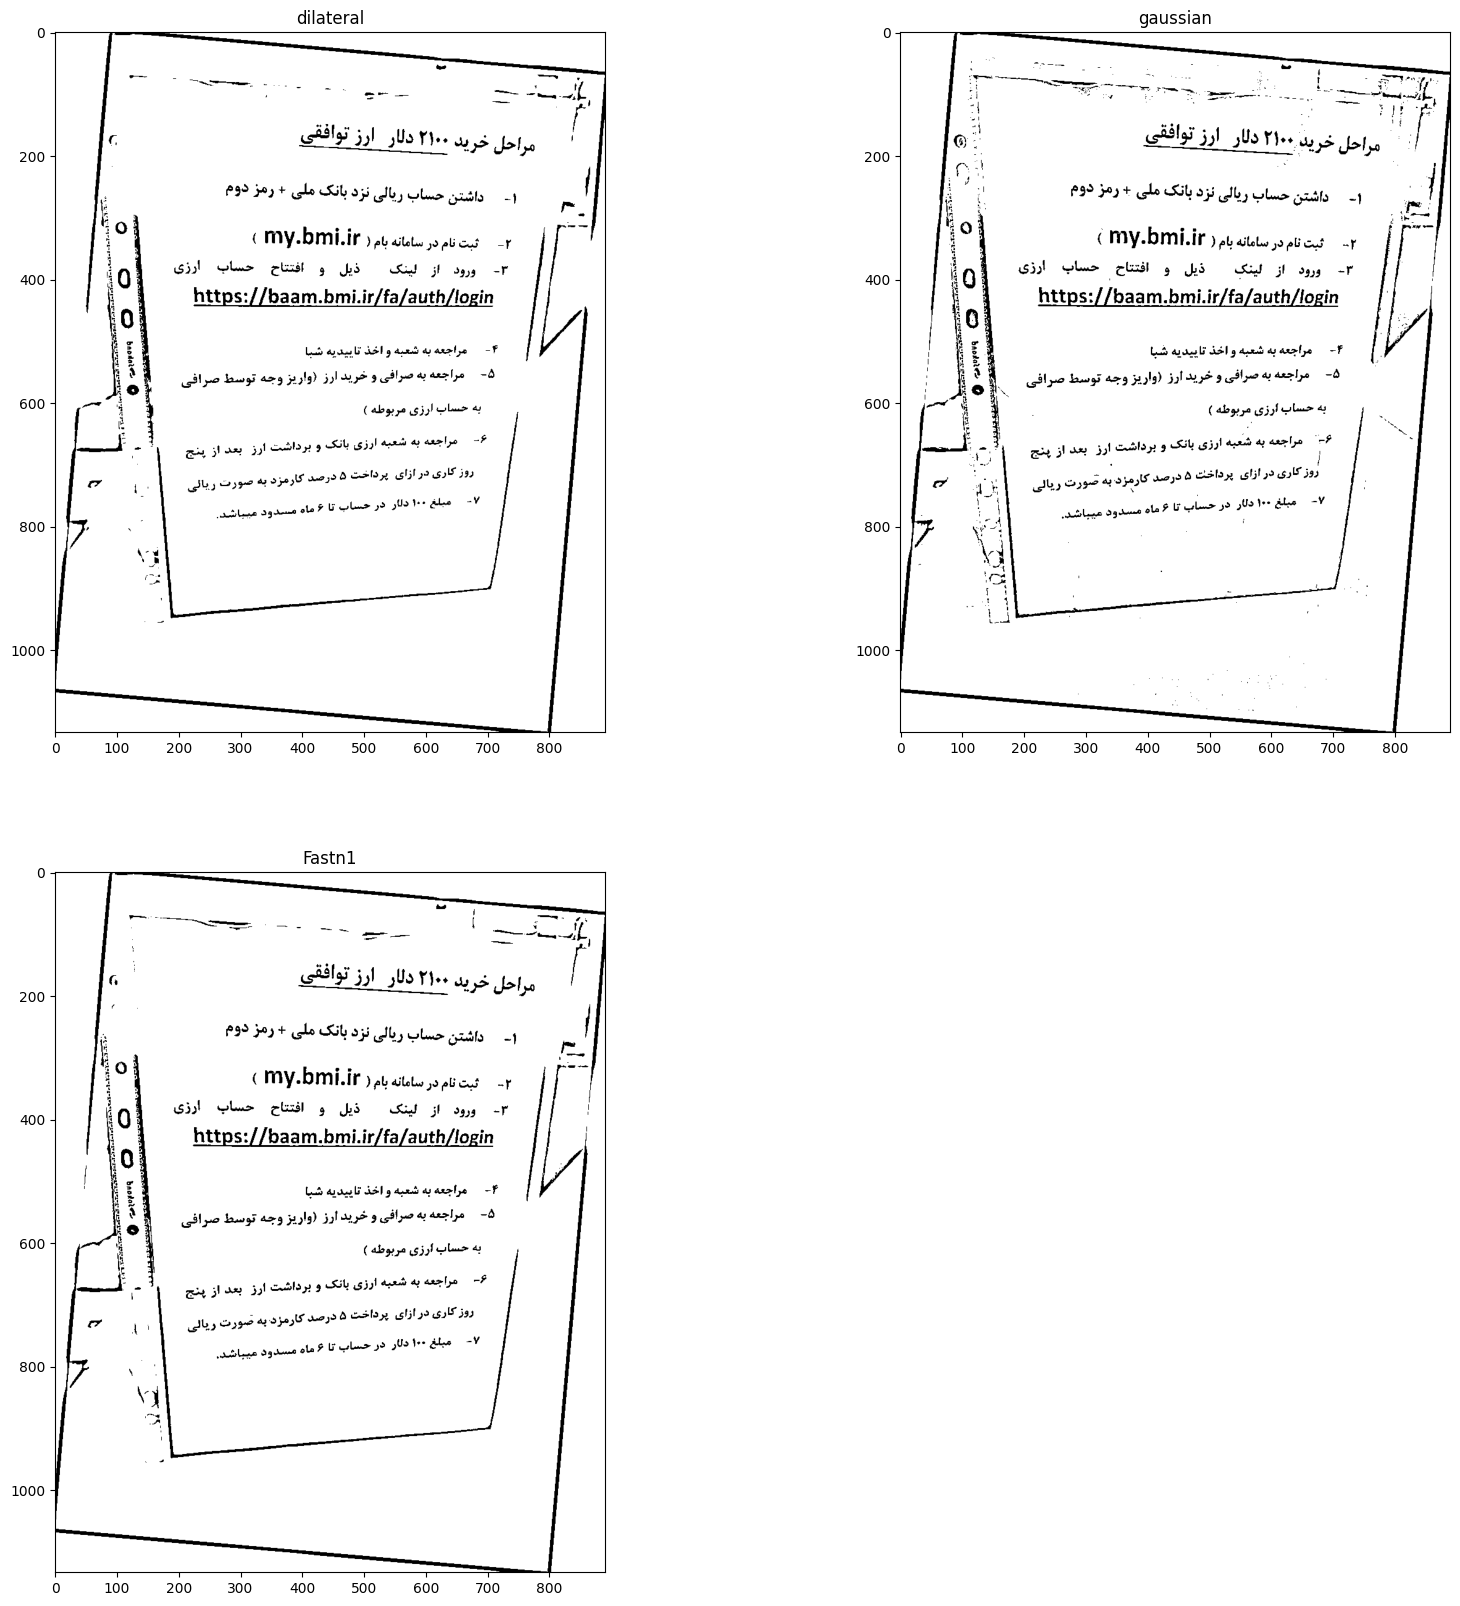

In [18]:
import numpy as np
from skimage import io
from skimage.transform import rotate
from skimage.color import rgb2gray
from deskew import determine_skew
from matplotlib import pyplot as plt
import cv2 
from skimage.filters import threshold_local
from PIL import Image


def resize(img_path):
    img = Image.open(img_path)
    length_x, width_y = img.size
    factor = float(1024.0 / length_x)
    size = int(factor * length_x), int(factor * width_y)
    image_resize = img.resize(size, Image.Resampling.LANCZOS)
    image_resize.save(f"{img_path.split('.')[0]}_upscaled.png", dpi=(300, 300))


def deskew(_img):
    image = io.imread(_img)
    grayscale = rgb2gray(image)
    angle = determine_skew(grayscale, num_peaks=17) #num_peaks=default(20), angle_pm_90=True
    rotated = rotate(image, angle, resize=True) * 255
    return rotated.astype(np.uint8)


def threshhold(img):
    V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))[2]
    T = threshold_local(V, 25, offset=15, method="gaussian")
    # Apply the threshold operation
    thresh = (V > T).astype("uint8") * 255
    return thresh 


def denoising1(img):  # best threshhold until now 1402/10/11 13:57 pm 
    blurred_img = cv2.bilateralFilter(img, 9, 75, 75)
    return blurred_img


def denoising2(img):
    ret3,th3 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return th3


def denoising3(img):
    denoised_img = cv2.fastNlMeansDenoisingColored(img, None, 6, 6, 7, 21)
    return denoised_img


def sharpness(img):
    # Create our shapening kernel, remember it must sum to one
    kernel_sharpening = np.array([[-1,-1,-1],
                                  [-1, 6,-1],
                                  ])

    # applying the sharpening kernel to the image
    sharpened = cv2.filter2D(img, -1, kernel_sharpening)
    return sharpened


def dilation(img):
    # Apply Dilation
    dilated_img = cv2.dilate(img, np.ones((3, 3), np.uint8), iterations=1)
    return dilated_img

def erotion(img):
    eroded_img = cv2.erode(img, np.ones((1, 1), np.uint8), iterations=2)
    return eroded_img

def opening(img):
    opened_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8), iterations=1)
    return opened_img

def closing(img):
    closed_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=1)
    return closed_img 


def display_before_after(_original):
    plt.figure(figsize=(20, 20))
    # plt.subplot(2, 2, 1)
    # plt.imshow(io.imread(_original))
    plt.subplot(2, 2, 1)
    plt.imshow(threshhold(denoising1(deskew(_original))), cmap='gray')
    plt.title("dilateral")
    plt.subplot(2, 2, 2)
    plt.imshow(denoising2(threshhold(deskew(_original))), cmap='gray')
    plt.title("gaussian")
    plt.subplot(2, 2, 3)
    plt.imshow(threshhold(denoising3(deskew(_original))), cmap='gray')
    plt.title("Fastn1")

display_before_after('samples/kaj3.jpg')


In [19]:
import pytesseract
import os


def predict_text_with_resize(image_path):
    resize(image_path)
    image_name = image_path.split(".")[0]
    image_path_new = image_name+"_upscaled.png"
    image = threshhold(denoising1(deskew(image_path_new)))
    custom_config = r'-l fas --psm 4'
    text = pytesseract.image_to_string(image, config=custom_config)
    os.remove(image_path_new)
    return text

def predict_text(image_path):
    image = threshhold(denoising1(deskew(image_path)))
    custom_config = r'-l fas --psm 4'
    text = pytesseract.image_to_string(image, config=custom_config)
    return text 


image_path = "samples/kaj3.jpg"
image_to_text = predict_text(image_path)
print(image_to_text)

۳ ت ک
7

7 مراحل خرید ۲۱۰۰ دلار از توافقی

/ ۳ داشتن حساب ریالی نزد بانک ملی + رمز دوم

۲ ثبت نام در سامانه با ۳۱۷۰۳۵۳۰1۲ )
۳ ورود از لینک . ذبل و افتتاحم حساب ارزی
«نوره۱۵5://۱۵۵۵۳۴۲۰۵۱۰۱۰۱۳/۲۵/۵۷/۱ظ

‎ -۴‏ مراجعه به شعبه و اخذ تاییدیه شبا
‎ -۵‏ مراجعه به صرافی و خرید ارز (واریز وجه توسط صرافی

‏به حساب ارزی مربوطه )

‏۳ ری از
مراجعه به شعبه ارزی بانک و برداشت ارز بعد از بنج

‏روز کاری در ازای_پرداخت زِ‌
ر ازای پرداخت ۵ درصد کارمزد به صورت ریالی

‏۷-_ مبلق ۱۰۰ دلار در حساب تا ۶ ماه مسدود میباشد




In [27]:
import pytesseract

image_path = 'samples/FaktoreForoush.png'
image1 = threshhold(denoising1(deskew(image_path)))
image2 = denoising2(threshhold(deskew(image_path)))
image3 = threshhold(denoising3(deskew(image_path)))

custom_config = r'-l fas --psm 4'
text1 = pytesseract.image_to_string(image1,config=custom_config)
text2 = pytesseract.image_to_string(image2,config=custom_config)
text3 = pytesseract.image_to_string(image3,config=custom_config)

In [28]:
print(text1)

صورت حساب فروش کالا و خدمات
شمار ۵ : ۱۰۱۳۱۴۰۷۰۴

نرم افزا ۲
"۳ ترم اقزاری محسن تاریخ : ۱۴۰۷/۰۴/۰۶
تماقا محسن طراحی و توسعه ترم افزار
۳
صورتحسب : مشتری اول توسط : معمد تفن :وله با
۳ 5
۲۹ شوع دام تعداد فی قیمت کل
۱ دام اول ۲
۲ دام دوم ۵
۴ ]دام زنده سوم ۶
توضیحات : از اتخاب ما متشکریم ۳ مهم
تخفیف (36۵) . |هه‌۲۵ه۳
حمل‌ونقل .. ]۰
ینج میلیون وهتتصد و یل وهقت فذاد 9 | مبیغ قابل پرداخت ]۵0۳۷۵۰۰
یاتسد ریال
اعضا,فریدار اعقا. فر

علی آ): یه هر چیز در نیا پیشتر انس داری: زانتر از آن بترس
شقادی :شایان ولی عصر(عج]
طفن : ۴۴۰۴۲۰ کد پستی: ‎"٩7۱۶۵۳۳۲۱‏ شماره اقتصادی ۰ ۱۲۳۳۵۶۷۸۹۰۱۲




In [23]:
import re
import pickle

alphabet = 'ا آ ب پ ت ث ج چ ح خ د ذ ر ز س ش ص ض ط ظ ع غ ف ق ک گ ل م ن و ه ی ء'

def words(text): 
    return re.findall(r'\w+', text.lower())

WORDS = pickle.load(open('Dictionary/Database.pkl', 'rb'))

def P(word, N=sum(WORDS.values())):
    "Probability of `word`."
    return WORDS[word] / N

def correction(word):
    list_symbols = r"<>?:{}|\+_()*&^%$#@~`.,"
    if word in list_symbols:
        return word 
    else:
        "Most probable spelling correction for word."
        word = normalizer(word)
        return max(candidates(word), key=P)

def candidates(word):
    "Generate possible spelling corrections for word."
    # return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])
    if known([word]) and WORDS[word] > 100:
        return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])
    else:
        return (known(edits1(word)) or known(edits2(word)) or [word])
def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def normalizer(word):
    word = word.replace('ي', 'ی')
    word = word.replace('ك', 'ک')
    word = word.replace('ٔ', '')
    return word

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'ا آ ب پ ت ث ج چ ح خ د ذ ر ز ژ س ش ص ض ط ظ ع غ ف ق ک گ ل م ن و ه ی ء'
    # print(letters)
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    # print(set(deletes + transposes + replaces + inserts))
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

print(correction("لبوانسی"))
# print(list(WORDS.items())[:100])

لبنانی


In [25]:
for sentence in image_to_text.split("\n"):
    print(sentence)
    list_corrected_word = []
    for word in sentence.split(" "):
        corrected_word = correction(word)
        list_corrected_word.append(corrected_word)
    print(" ".join(list_corrected_word))

۳ ت ک
۳ ت ک
7
7


7 مراحل خرید ۲۱۰۰ دلار از توافقی
7 مراحل خرید ۲۱۰۰ دلار از توافقی


/ ۳ داشتن حساب ریالی نزد بانک ملی + رمز دوم
و ۳ داشتن حساب ریالی نزد بانک ملی + رمز دوم


۲ ثبت نام در سامانه با ۳۱۷۰۳۵۳۰1۲ )
۲ ثبت نام در سامانه با ۳۱۷۰۳۵۳۰1۲ )
۳ ورود از لینک . ذبل و افتتاحم حساب ارزی
۳ ورود از لینک . قبل و افتتاح حساب ارزی
«نوره۱۵5://۱۵۵۵۳۴۲۰۵۱۰۱۰۱۳/۲۵/۵۷/۱ظ
«نوره۱۵5://۱۵۵۵۳۴۲۰۵۱۰۱۰۱۳/۲۵/۵۷/۱ظ


‎ -۴‏ مراجعه به شعبه و اخذ تاییدیه شبا
و ۴ مراجعه به شعبه و اخذ تاییدیه با
‎ -۵‏ مراجعه به صرافی و خرید ارز (واریز وجه توسط صرافی
و ۵ مراجعه به صرافی و خرید ارز واریز وجه توسط صرافی


‏به حساب ارزی مربوطه )
به حساب ارزی مربوطه )


‏۳ ری از
۳ ری از
مراجعه به شعبه ارزی بانک و برداشت ارز بعد از بنج
مراجعه به شعبه ارزی بانک و برداشت ارز بعد از بن


‏روز کاری در ازای_پرداخت زِ‌
روز کاری در ازای_پرداخت زیر
ر ازای پرداخت ۵ درصد کارمزد به صورت ریالی
ر ازای پرداخت ۵ درصد کارمند به صورت ریالی


‏۷-_ مبلق ۱۰۰ دلار در حساب تا ۶ ماه مسدود میباشد
۷_ مطلق ۱۰۰ دلار در حساب تا ۶ ماه مسدود میباشد




